##**Diabetes Prediction with Binary Classification**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score,
                           recall_score, precision_score, f1_score,
                           roc_curve, roc_auc_score)

##**1. Understanding the Problem**
We want to predict if a patient has diabetes (1) or not (0) based on their blood glucose level.

In [ ]:
# Training data
train_data = {'Glucose': [67, 103, 114, 72, 116, 65],
              'Diabetic': [0, 1, 1, 0, 1, 0]}
train_df = pd.DataFrame(train_data)

print("Training Data:")
print(train_df)

Training Data:
   Glucose  Diabetic
0       67         0
1      103         1
2      114         1
3       72         0
4      116         1
5       65         0


##**2. How Logistic Regression Works**
###The Sigmoid Function
Logistic regression uses an S-shaped curve to convert glucose levels into probabilities (0 to 1):

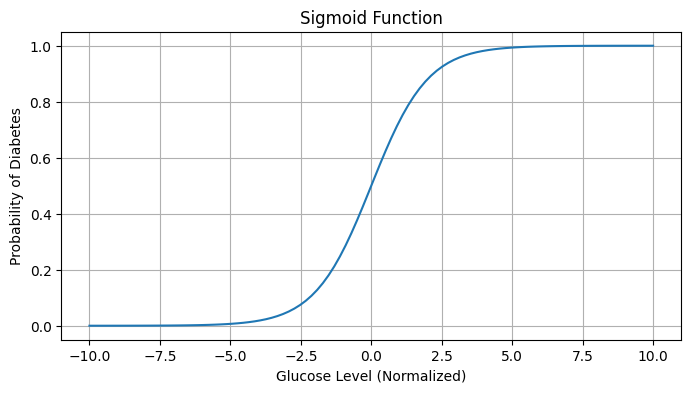

In [ ]:
# Visualizing the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-10, 10, 100)
plt.figure(figsize=(8,4))
plt.plot(x_values, sigmoid(x_values))
plt.title("Sigmoid Function")
plt.xlabel("Glucose Level (Normalized)")
plt.ylabel("Probability of Diabetes")
plt.grid(True)
plt.show()

##**Training the Model**

In [ ]:
X_train = train_df[['Glucose']]
y_train = train_df['Diabetic']

model = LogisticRegression()
model.fit(X_train, y_train)

print("\nModel trained! Let's make some predictions.")


Model trained! Let's make some predictions.


##**3. Making Predictions**
The model converts glucose levels to probabilities, then classifies as diabetic if probability > 0.5:

In [ ]:
# Example prediction for glucose level of 90
glucose_90 = pd.DataFrame({'Glucose': [90]})

prob = model.predict_proba(glucose_90)[0][1]
pred = model.predict(glucose_90)

print(f"For glucose level 90:")
print(f"Probability: {prob:.2f}")
print(f"Prediction: {'Diabetic' if pred == 1 else 'Not Diabetic'}")

For glucose level 90:
Probability: 0.66
Prediction: Diabetic


##**4. Evaluating the Model**
###**Validation Data**

In [ ]:
val_data = {'Glucose': [66, 107, 112, 71, 87, 89],
            'Diabetic': [0, 1, 1, 0, 1, 1]}
val_df = pd.DataFrame(val_data)

X_val = val_df[['Glucose']]
y_val = val_df['Diabetic']
y_pred = model.predict(X_val)

###**Confusion Matrix**


Confusion Matrix:
[[2 0]
 [1 3]]


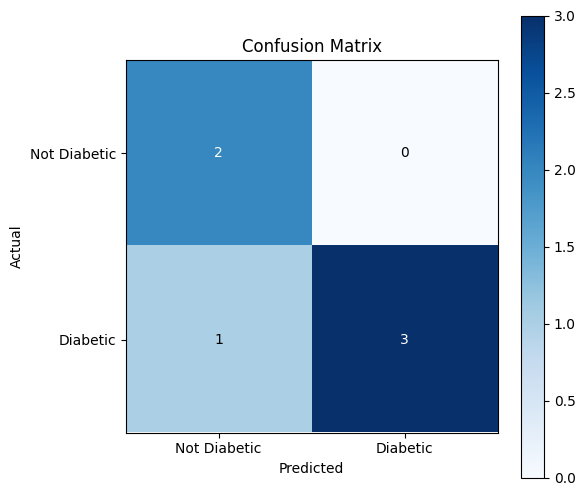

In [ ]:
cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Not Diabetic", "Diabetic"])
plt.yticks([0,1], ["Not Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add numbers to cells
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]), ha="center", va="center", color="white" if cm[i][j] > cm.max()/2 else "black")
plt.show()

###**Key Metrics**

In [ ]:
metrics = {
    "Accuracy": accuracy_score(y_val, y_pred),
    "Recall": recall_score(y_val, y_pred),
    "Precision": precision_score(y_val, y_pred),
    "F1-Score": f1_score(y_val, y_pred)
}

print("\nModel Performance:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")


Model Performance:
Accuracy: 0.83
Recall: 0.75
Precision: 1.00
F1-Score: 0.86


##**5. ROC Curve Analysis**

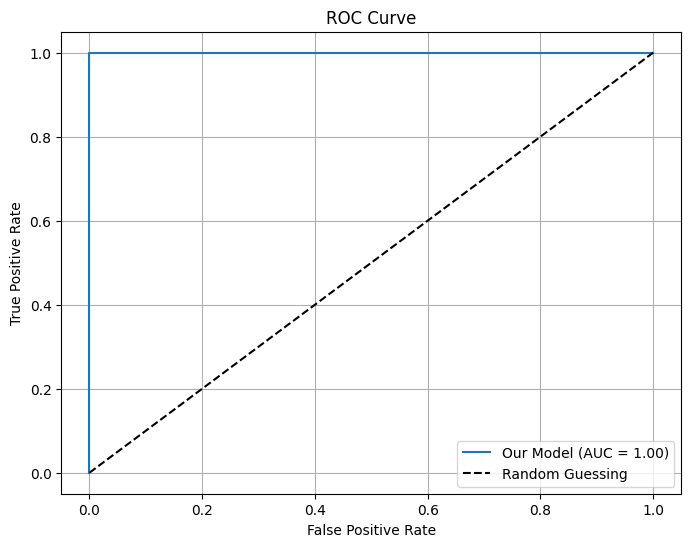

In [ ]:
# Get probability scores
y_scores = model.predict_proba(X_val)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
auc_score = roc_auc_score(y_val, y_scores)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Our Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

##**6. Practical Interpretation**

In [ ]:
interpretation = """
Key Takeaways:

1. **Accuracy (0.83):**
   - 83% of all predictions were correct
   - But be careful with imbalanced data!

2. **Recall (0.75):**
   - Identifies 75% of actual diabetic cases
   - Important when missing cases is costly

3. **Precision (1.00):**
   - 100% of predicted diabetics were correct
   - Important when false alarms are costly

4. **F1-Score (0.86):**
   - Balanced measure of recall and precision

5. **AUC (0.88):**
   - Model is significantly better than random guessing
   - Good at distinguishing diabetic vs non-diabetic
"""

print(interpretation)


Key Takeaways:

1. **Accuracy (0.83):** 
   - 83% of all predictions were correct
   - But be careful with imbalanced data!

2. **Recall (0.75):** 
   - Identifies 75% of actual diabetic cases
   - Important when missing cases is costly

3. **Precision (1.00):** 
   - 100% of predicted diabetics were correct
   - Important when false alarms are costly

4. **F1-Score (0.86):**
   - Balanced measure of recall and precision

5. **AUC (0.88):**
   - Model is significantly better than random guessing
   - Good at distinguishing diabetic vs non-diabetic

